20230802111 NIKHIL CHAPKANADE

🏠 Initial Environment:

🧭 Environment State:
A: Dirty | B: Dirty
C: Dirty | D: Dirty
🤖 Agent is at: C
⭐ Current Score: 0
--------------------------------------------------

🔁 Step 1/20
🧹 Cleaning room C...

🧭 Environment State:
A: Dirty | B: Dirty
C: Clean | D: Dirty
🤖 Agent is at: C
⭐ Current Score: 10
--------------------------------------------------

🔁 Step 2/20
🚶 Moving from C → B

🧭 Environment State:
A: Dirty | B: Dirty
C: Clean | D: Dirty
🤖 Agent is at: B
⭐ Current Score: 9
--------------------------------------------------

🔁 Step 3/20
🧹 Cleaning room B...
💨 Room C became dirty again!

🧭 Environment State:
A: Dirty | B: Clean
C: Dirty | D: Dirty
🤖 Agent is at: B
⭐ Current Score: 19
--------------------------------------------------

🔁 Step 4/20
🚶 Moving from B → A

🧭 Environment State:
A: Dirty | B: Clean
C: Dirty | D: Dirty
🤖 Agent is at: A
⭐ Current Score: 18
--------------------------------------------------

🔁 Step 5/20
🧹 Cleaning room A...

🧭 Environment State:
A: Clean |

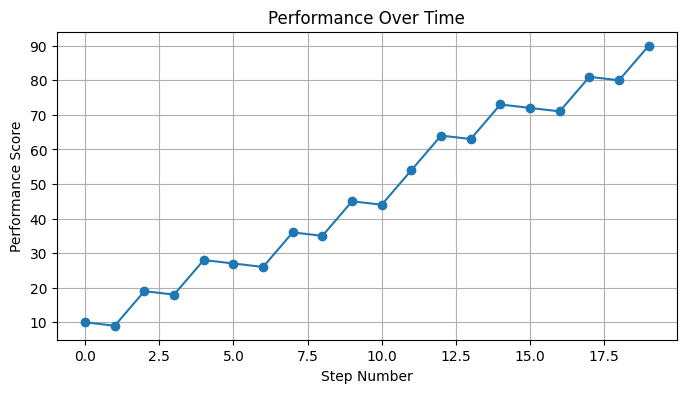

In [ ]:

import random
import time
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# STEP 1: Define the Environment Class
# --------------------------------------------------------------
class Environment:
    def __init__(self):
        """
        Initialize a 2x2 grid environment with random 'Clean' or 'Dirty' rooms.
        The grid rooms are represented as:
        A | B
        -----
        C | D
        """
        self.rooms = {
            "A": random.choice(["Clean", "Dirty"]),
            "B": random.choice(["Clean", "Dirty"]),
            "C": random.choice(["Clean", "Dirty"]),
            "D": random.choice(["Clean", "Dirty"]),
        }

        # Start agent at random location
        self.agent_location = random.choice(list(self.rooms.keys()))

        # Initialize performance score
        self.score = 0

    def display(self):
        """Displays the current environment state and agent position."""
        print("\n🧭 Environment State:")
        print(f"A: {self.rooms['A']} | B: {self.rooms['B']}")
        print(f"C: {self.rooms['C']} | D: {self.rooms['D']}")
        print(f"🤖 Agent is at: {self.agent_location}")
        print(f"⭐ Current Score: {self.score}")
        print("-" * 50)

    def regenerate_dirt(self, probability=0.2):
        """
        Randomly make some rooms dirty again to simulate a dynamic environment.
        probability: 20% chance that a clean room becomes dirty again.
        """
        for room in self.rooms:
            if self.rooms[room] == "Clean" and random.random() < probability:
                self.rooms[room] = "Dirty"
                print(f"💨 Room {room} became dirty again!")

# --------------------------------------------------------------
# STEP 2: Define the Vacuum Cleaner Agent
# --------------------------------------------------------------
class VacuumAgent:
    def __init__(self, environment):
        """
        Initialize the agent with a reference to the environment.
        """
        self.env = environment
        self.performance_log = []  # To store performance for visualization

    def perceive_and_act(self):
        """
        The agent perceives its current state and decides on the best action.
        Rules:
        1. If the current room is dirty → Clean it (+10)
        2. If clean → Move to another room (-1)
        """
        location = self.env.agent_location
        status = self.env.rooms[location]

        if status == "Dirty":
            # Clean current room
            print(f"🧹 Cleaning room {location}...")
            self.env.rooms[location] = "Clean"
            self.env.score += 10
        else:
            # Move to another random room
            next_room = random.choice(list(self.env.rooms.keys()))
            while next_room == location:  # ensure actual movement
                next_room = random.choice(list(self.env.rooms.keys()))
            print(f"🚶 Moving from {location} → {next_room}")
            self.env.agent_location = next_room
            self.env.score -= 1

        # Log performance after each action
        self.performance_log.append(self.env.score)

# --------------------------------------------------------------
# STEP 3: Simulation Function
# --------------------------------------------------------------
def run_simulation(steps=15):
    """
    Simulates the agent-environment interaction for a fixed number of steps.
    """
    env = Environment()               # Create environment
    agent = VacuumAgent(env)          # Create agent

    print("🏠 Initial Environment:")
    env.display()

    for step in range(steps):
        print(f"\n🔁 Step {step + 1}/{steps}")
        agent.perceive_and_act()      # Agent perceives and acts
        env.regenerate_dirt()         # Randomly make rooms dirty again
        env.display()                 # Show updated environment
        time.sleep(0.5)               # Delay for readability

    print("\n✅ Simulation Complete!")
    print(f"🏁 Final Room States: {env.rooms}")
    print(f"🎯 Final Score: {env.score}")

    # Plot performance score over time
    plt.figure(figsize=(8,4))
    plt.plot(agent.performance_log, marker='o')
    plt.title("Performance Over Time")
    plt.xlabel("Step Number")
    plt.ylabel("Performance Score")
    plt.grid(True)
    plt.show()

# --------------------------------------------------------------
# STEP 4: Run Simulation
# --------------------------------------------------------------
if __name__ == "__main__":
    run_simulation(steps=20)